# 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_train = pd.read_csv('Data/train_pos.csv')
df_test = pd.read_csv('Data/test_pos.csv')
df_val = pd.read_csv('Data/val_pos.csv')

In [3]:
X_train, y_train = df_train['lemmatized_and_pos'], df_train['target']
X_test, y_test = df_test['lemmatized_and_pos'], df_test['target']
X_val, y_val = df_val['lemmatized_and_pos'], df_val['target']

# 2. Define Best Model

I chose the Linear SVC as my best model, as although the accuracy is slightly lower than the best neural net, it is much easier and quicker to train and implement

In [4]:
#best model

pipe_best_model = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   LinearSVC(penalty='l2',C=0.3,tol=1e-7,loss='squared_hinge',class_weight='balanced')),
])

In [5]:
%store -r target_name_dict
target_name_dict

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [6]:
pipe_best_model.fit(X_train,y_train)
pred_train = pipe_best_model.predict(X_train)
pred_test = pipe_best_model.predict(X_test)


In [7]:
accuracy = make_scorer(accuracy_score)

precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'precision':precision,'recall':recall,'f1':f1}

In [8]:
from yellowbrick.classifier import ROCAUC

In [9]:
def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        visualizer.show(outpath='confusion_matrix.png');
        visualizer.show(outpath='Images/best_model_confusion_matrix.png');
        return visualizer.poof()

accuracy:  0.8434
f1_score: 0.8434
precision_score: 0.8434
recall_score: 0.8434


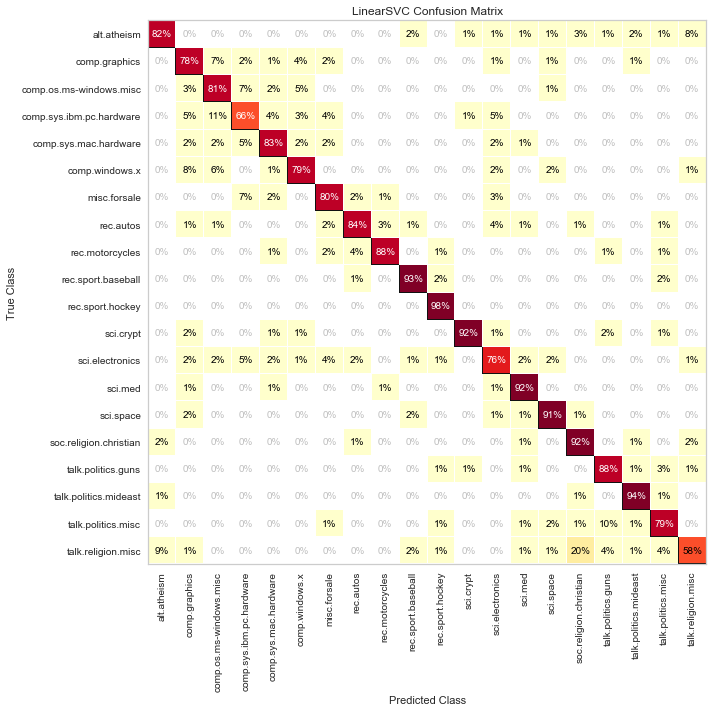

In [10]:
plt.figure(figsize=(10,10))
print("accuracy: ", round(accuracy_score(y_test,pred_test),4))
for scorer in [f1_score,precision_score,recall_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_test, pred_test,average="micro"):.4f}')
CM(pipe_best_model,classes = [name for name in target_name_dict]);


The confusion matrix shows that most classes have a >80% classification accuracy, however there is some misclassification, particularly in the talk.religion.misc category, which only has a 58% accuracy. and is commonly miscategorised as soc.religion (20%) or alt.atheism (9%). As these categories are all about religion it does make sense that they would be harder to differentiate.

On a similar note, there is also notable miscategorisation between the 5 different comp. classes

In [11]:
def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        visualizer.show(outpath='Images/best_model_roc_curve.png');
        return visualizer.poof() 

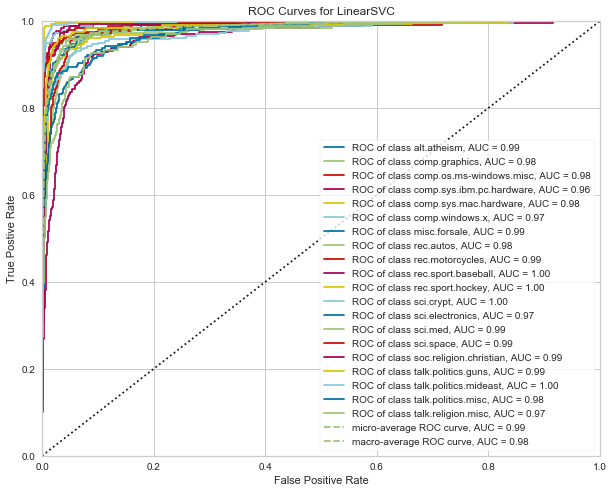

In [12]:
plt.figure(figsize=(10,8))
ROC(pipe_best_model,classes = [name for name in target_name_dict])
# visualizer.show(outpath='roc_curve.png');

In [13]:
def CR(model,classes):
        visualizer = ClassificationReport(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        visualizer.show(outpath='Images/best_model_classification_report.png');
        return visualizer.poof()

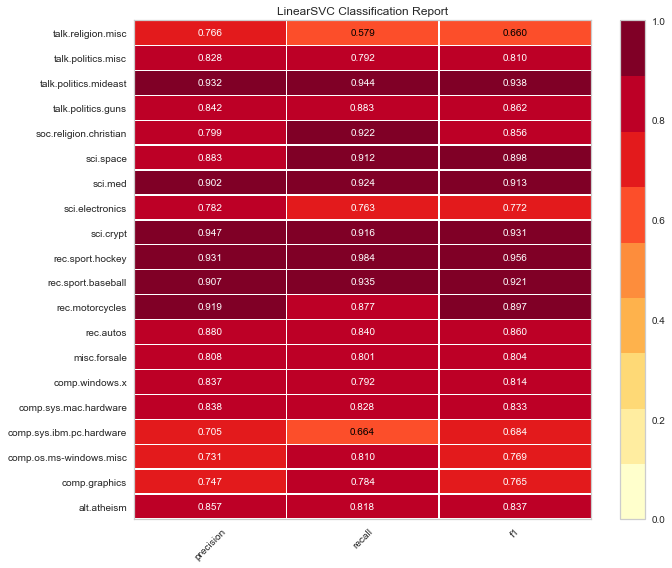

In [14]:
plt.figure(figsize=(10,8))
CR(pipe_best_model,classes = [name for name in target_name_dict])

# 3. Future Work

The 20 newsgroup classes consist of 7 superclasses, alt, comp, misc, rec, sci, soc and talk. Due to the confusion between classes and within classes that the classifiers all had, it would be a good approach sequentially classify the data, to first separate the classes into the 7 superclasses and then into the final classes within each superclass. 

In [15]:
target_name_dict

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [16]:
replacement_dict= {0:[0],1:[1,2,3,4,5],2:[6],3:[7,8,9,10],4:[11,12,13,14],5:[15],6:[16,17,18,19]}

In [17]:
replacement_dict.items()

dict_items([(0, [0]), (1, [1, 2, 3, 4, 5]), (2, [6]), (3, [7, 8, 9, 10]), (4, [11, 12, 13, 14]), (5, [15]), (6, [16, 17, 18, 19])])

In [18]:
#create a new target variable for each superclass

for k, v in replacement_dict.items():
    df_test.loc[df_test.target.isin(v), 'target_initial'] = k
    df_train.loc[df_train.target.isin(v), 'target_initial'] = k
    df_val.loc[df_val.target.isin(v), 'target_initial'] = k

In [19]:
df_test.target_initial = df_test.target_initial.astype('int')
df_train.target_initial = df_train.target_initial.astype('int')
df_val.target_initial = df_val.target_initial.astype('int')

In [20]:
X_train, y_train_initial = df_train['lemmatized_and_pos'], df_train['target_initial']
X_test, y_test_initial = df_test['lemmatized_and_pos'], df_test['target_initial']
X_val, y_val_initial = df_val['lemmatized_and_pos'], df_val['target_initial']

In [21]:
pipe_best_model.fit(X_train,y_train_initial)
pred_train = pipe_best_model.predict(X_train)
pred_test = pipe_best_model.predict(X_val)

In [22]:
df_train['initial_pred'] = pd.DataFrame(pred_train)

In [23]:
df_train

,lemmatized_and_pos,target,target_initial,initial_pred
0,mycal atari processor distribution world acsys...,12,4,4
1,jason cockroft pen fan reaction sun microsyste...,10,3,3
2,steve vranyes teleuse uim motorola land mobile...,5,1,1
3,viper news software vax vms vnews arizona stat...,7,3,3
4,gilles khouzam window ati ultra mach chip sizi...,2,1,1
...,...,...,...,...
10595,brad hernlem hezbollah reply brad hernlem ncsu...,17,6,6
10596,dennis holt honda clutch chatter university mi...,7,3,3
10597,olsondl pill deer hunting line vast majority g...,16,6,6
10598,eric dynamic kawai way cheapo buy sorry etc et...,6,2,2


In [24]:
df_train1 = df_train.loc[df_train.initial_pred == 1]

In [25]:
df_train1

,lemmatized_and_pos,target,target_initial,initial_pred
2,steve vranyes teleuse uim motorola land mobile...,5,1,1
4,gilles khouzam window ati ultra mach chip sizi...,2,1,1
7,change licensed data window marquette universi...,2,1,1
18,jim simm speed distribution world ncr microele...,3,1,1
22,daniel mccoy motifbc reply net inc posted krak...,5,1,1
...,...,...,...,...
10569,amit shaked digital terrain data visualization...,1,1,1
10571,john komp price drop within month article leon...,4,1,1
10591,nightline editres pie tvt keywords editres twm...,5,1,1
10593,greg shaw ide scsi xel communication inc newsr...,3,1,1


In [26]:
group_dict = {'alt': 0,
 'comp' : 1,
 'misc': 2,
 'rec': 3,
 'sci':4,
'soc':5,
'talk':6}

In [27]:
def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train_initial)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test_initial)  # Evaluate the model on the test data 
        visualizer.show(outpath='Images/superclass_confusion_matrix.png');
        return visualizer.poof()

accuracy:  0.9015
f1_score: 0.9015
precision_score: 0.9015
recall_score: 0.9015


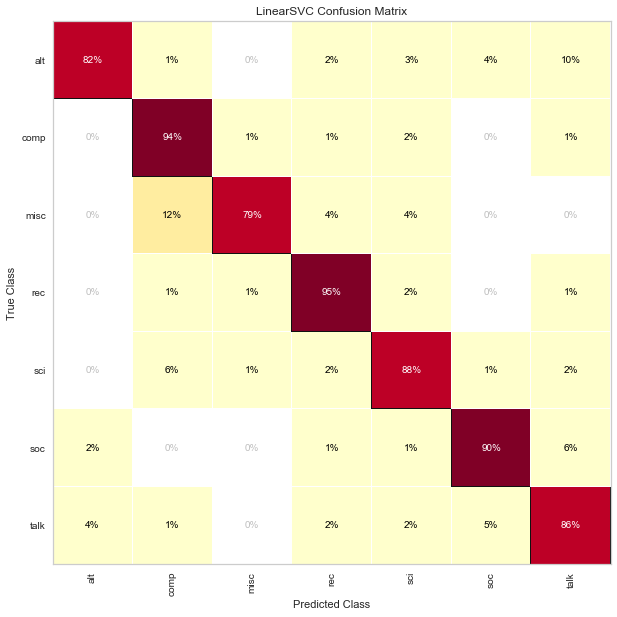

In [28]:
#use the best model to classify superclasses

plt.figure(figsize=(10,10))
print("accuracy: ", round(accuracy_score(y_val_initial,pred_test),4))
for scorer in [f1_score,precision_score,recall_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_val_initial, pred_test,average="micro"):.4f}')
CM(pipe_best_model,classes = [k for k in group_dict]);


In [29]:
#test the best model classifier on the comp.* superclass 

df_train_comp = df_train[df_train.target_initial == 1]
df_val_comp = df_val[df_val.target_initial == 1]

In [30]:
df_train_comp.target.replace([1,2,3,4,5],[0,1,2,3,4], inplace=True)

In [31]:
df_val_comp.target.replace([1,2,3,4,5],[0,1,2,3,4], inplace=True)

In [32]:
X_train_comp, y_train_comp = df_train_comp['lemmatized_and_pos'],df_train_comp['target']
X_val_comp, y_val_comp = df_val_comp['lemmatized_and_pos'],df_val_comp['target']

In [33]:
pipe_best_model.fit(X_train_comp,y_train_comp)
pred_train = pipe_best_model.predict(X_train_comp)
pred_val = pipe_best_model.predict(X_val_comp)

In [34]:
comp_dict = {
             'comp.graphics': 0,
 'comp.os.ms-windows.misc': 1,
 'comp.sys.ibm.pc.hardware': 2,
 'comp.sys.mac.hardware': 3,
    'comp.windows.x': 4
    
 }

In [35]:
def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train_comp, y_train_comp)  # Fit the visualizer and the model
        visualizer.score(X_val_comp, y_val_comp)  # Evaluate the model on the test data 
        visualizer.show(outpath='Images/comp_confusion_matrix.png');
        return visualizer.poof()
    


accuracy:  0.8156
f1_score: 0.8156
precision_score: 0.8156
recall_score: 0.8156


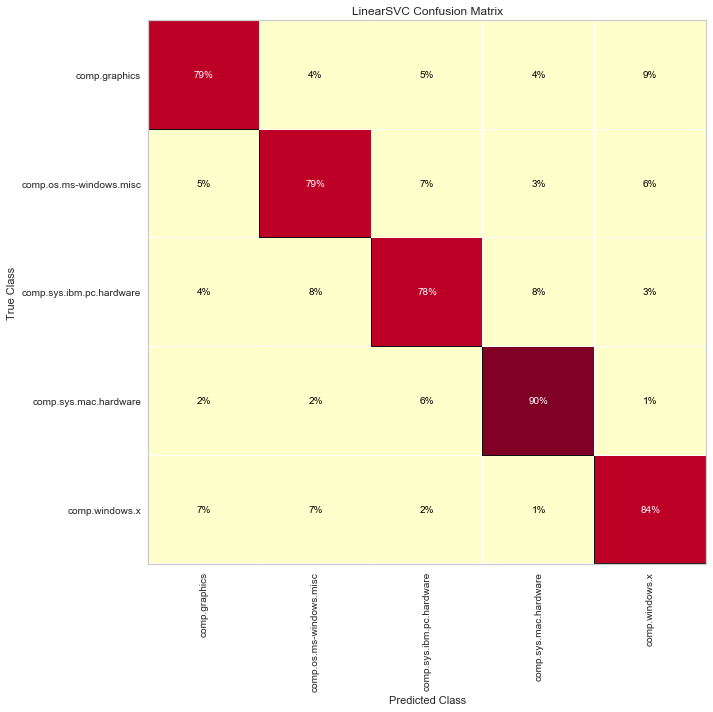

In [36]:
plt.figure(figsize=(10,10))
print("accuracy: ", round(accuracy_score(y_val_comp,pred_val),4))
for scorer in [f1_score,precision_score,recall_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_val_comp, pred_val,average="micro"):.4f}')
CM(pipe_best_model,classes=[name for name in comp_dict]);